In [1]:
from heapq import heappush, heappop
from numpy import asarray
from PIL import Image
import random

class Puzzle:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state

    def find_red_chunk_index(self, chunks):
        for i, chunk in enumerate(chunks):
            if chunk.mode == 'RGB' and chunk.getcolors() == [(chunk.size[0]*chunk.size[1], (255, 0, 0))]:
                return i
        return -1  # Return -1 if no red chunk is found

    def get_neighbors(self, state):
        neighbors = []
        i = self.find_red_chunk_index(state)
        n = 32

        if i % n > 0: #col>0
            neighbor = state.copy()
            temp = neighbor[i]
            neighbor[i] = neighbor[i-1]
            neighbor[i-1] = temp
            neighbors.append(neighbor)
        
        if i % n < n-1: #col<max
            neighbor = state.copy()
            temp = neighbor[i]
            if i+1 >= n*n:
                tt = n*n - 1
            else:
                tt = i+1
            neighbor[i] = neighbor[tt]
            neighbor[tt] = temp
            neighbors.append(neighbor)
    
        if i // n > 0: #row>0
            neighbor = state.copy()
            temp = neighbor[i]
            neighbor[i] = neighbor[i-n]
            neighbor[i-n] = temp
            neighbors.append(neighbor)
        
        if i // n < n-1: #row<max
            neighbor = state.copy()
            temp = neighbor[i]
            neighbor[i] = neighbor[i+n]
            neighbor[i+n] = temp
            neighbors.append(neighbor)
        
        return neighbors

    def heuristic(self, state):
        return sum([1 for i, chunk in enumerate(state) if chunk.tobytes() != self.goal_state[i].tobytes()])

    def a_star(self):
        # Initialize the queue with the initial state
        queue = [(self.heuristic(self.initial_state), 0, [self.initial_state])]
        visited = set()
        num = 0
        
        while queue:
            num += 1
            # Remove the state with the lowest priority from the queue
            queue.sort(key=lambda x: x[0])
            _, g, path = queue.pop(0)
            current_state = path[-1]
            
            if current_state == self.goal_state:
                # Return the path if the goal state is reached
                return path
            
            current_state_bytes = b"".join([img.tobytes() for img in current_state])
            current_state_tuple = tuple(current_state_bytes) 
            if current_state_tuple in visited:
                continue
            visited.add(current_state_tuple)
            
            # Generate the neighboring states and add them to the queue
            for neighbor_state in self.get_neighbors(current_state):
                neighbor_state_bytes = b"".join([img.tobytes() for img in neighbor_state])
                neighbor_state_tuple = tuple(neighbor_state_bytes) 
                if neighbor_state_tuple not in visited:
                    # Calculate the priority and add the state to the queue
                    f = g + 1 + self.heuristic(neighbor_state)
                    queue.append((f, g + 1, path + [neighbor_state]))
        
        # Return None if no path is found
        return None
def display_image_from_chunks(chunks):
    # Combine the chunks into a single image
    num_chunks = len(chunks)
    chunk_size = chunks[0].size[0]
    image_size = chunk_size * int(num_chunks ** 0.5)

    # Create a new image object with the combined size
    image = Image.new("RGB", (image_size, image_size))

    # Paste the chunks into the new image object
    for i, chunk in enumerate(chunks):
        x = (i % int(num_chunks ** 0.5)) * chunk_size
        y = (i // int(num_chunks ** 0.5)) * chunk_size
        image.paste(chunk, (x, y))

    # Display the image
    image.show()


In [2]:
# Load the image and split it into chunks
def process_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    img = img.resize((512, 512))

    # Define the chunk size
    chunk_size = 16

    # Calculate the number of chunks in the x and y direction
    x_chunks = img.width // chunk_size
    y_chunks = img.height // chunk_size

    # Create an empty list to store the chunks
    chunks = []

    # Loop through the image and extract each chunk
    for y in range(y_chunks):
        for x in range(x_chunks):
            # Define the coordinates of the chunk
            left = x * chunk_size
            top = y * chunk_size
            right = left + chunk_size
            bottom = top + chunk_size
            # Crop the image to the chunk
            chunk = img.crop((left, top, right, bottom))
            # Append the chunk to the list
            chunks.append(chunk)

    # Make one chunk red (the first chunk)
    chunks[0] = Image.new('RGB', (chunk_size, chunk_size), (255, 0, 0))
    print("Before Shuffling")
    display_image_from_chunks(chunks)
    goal_state=chunks.copy()
    # Shuffle the chunks randomly
    random.shuffle(chunks)
    print("Shuffled image:")
    display_image_from_chunks(chunks)
    initial_state=chunks.copy()
    return initial_state, goal_state



# Call the function with the image file path
image_path = "images.jpg"
initial_state, goal_state = process_image(image_path)


# Create a new puzzle instance with the initial and goal states
puzzle = Puzzle(initial_state, goal_state)

# Solve the puzzle using A*
solution_path = puzzle.a_star()

# Display the initial state, goal state, and the intermediate states in the solution path
# display_image_from_chunks(initial_state)
# display_image_from_chunks(goal_state)
# Run the A* search algorithm to find a solution path
# solution_path = puzzle.a_star()

# Check if a solution path was found
if solution_path is None:
    print("No solution path found.")
else:
    # Display the solution path
    for state in solution_path:
        display_image_from_chunks(state)


Before Shuffling
Shuffled image:


KeyboardInterrupt: 

In [3]:
from heapq import heappush, heappop
from numpy import asarray
from PIL import Image
import random

class Puzzle:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state

    def find_red_chunk_index(self, chunks):
        for i, chunk in enumerate(chunks):
            if chunk.mode == 'RGB' and chunk.getcolors() == [(chunk.size[0]*chunk.size[1], (255, 0, 0))]:
                return i
        return -1  # Return -1 if no red chunk is found

    def get_neighbors(self, state):
        neighbors = []
        i = self.find_red_chunk_index(state)
        n = 2

        if i % n > 0: #col>0
            neighbor = state.copy()
            temp = neighbor[i]
            neighbor[i] = neighbor[i-1]
            neighbor[i-1] = temp
            neighbors.append(neighbor)
        
        if i % n < n-1: #col<max
            neighbor = state.copy()
            temp = neighbor[i]
            if i+1 >= n*n:
                tt = n*n - 1
            else:
                tt = i+1
            neighbor[i] = neighbor[tt]
            neighbor[tt] = temp
            neighbors.append(neighbor)
    
        if i // n > 0: #row>0
            neighbor = state.copy()
            temp = neighbor[i]
            neighbor[i] = neighbor[i-n]
            neighbor[i-n] = temp
            neighbors.append(neighbor)
        
        if i // n < n-1: #row<max
            neighbor = state.copy()
            temp = neighbor[i]
            neighbor[i] = neighbor[i+n]
            neighbor[i+n] = temp
            neighbors.append(neighbor)
        
        return neighbors

    def heuristic(self, state):
        return sum([1 for i, chunk in enumerate(state) if chunk.tobytes() != self.goal_state[i].tobytes()])

    def a_star(self):
        # Initialize the queue with the initial state
        queue = [(self.heuristic(self.initial_state), 0, [self.initial_state])]
        visited = set()
        num = 0
        
        while queue:
            num += 1
            # Remove the state with the lowest priority from the queue
            queue.sort(key=lambda x: x[0])
            _, g, path = queue.pop(0)
            current_state = path[-1]
            
            if current_state == self.goal_state:
                # Return the path if the goal state is reached
                return path
            
            current_state_bytes = b"".join([img.tobytes() for img in current_state])
            current_state_tuple = tuple(current_state_bytes) 
            if current_state_tuple in visited:
                continue
            visited.add(current_state_tuple)
            
            # Generate the neighboring states and add them to the queue
            for neighbor_state in self.get_neighbors(current_state):
                neighbor_state_bytes = b"".join([img.tobytes() for img in neighbor_state])
                neighbor_state_tuple = tuple(neighbor_state_bytes) 
                if neighbor_state_tuple not in visited:
                    # Calculate the priority and add the state to the queue
                    f = g + 1 + self.heuristic(neighbor_state)
                    queue.append((f, g + 1, path + [neighbor_state]))
        
        # Return None if no path is found
        return None
def display_image_from_chunks(chunks):
    # Combine the chunks into a single image
    num_chunks = len(chunks)
    chunk_size = chunks[0].size[0]
    image_size = chunk_size * int(num_chunks ** 0.5)

    # Create a new image object with the combined size
    image = Image.new("RGB", (image_size, image_size))

    # Paste the chunks into the new image object
    for i, chunk in enumerate(chunks):
        x = (i % int(num_chunks ** 0.5)) * chunk_size
        y = (i // int(num_chunks ** 0.5)) * chunk_size
        image.paste(chunk, (x, y))

    # Display the image
    image.show()


In [5]:
# Load the image and split it into chunks
def process_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    img = img.resize((512, 512))

    # Define the chunk size
    chunk_size = 256

    # Calculate the number of chunks in the x and y direction
    x_chunks = img.width // chunk_size
    y_chunks = img.height // chunk_size

    # Create an empty list to store the chunks
    chunks = []

    # Loop through the image and extract each chunk
    for y in range(y_chunks):
        for x in range(x_chunks):
            # Define the coordinates of the chunk
            left = x * chunk_size
            top = y * chunk_size
            right = left + chunk_size
            bottom = top + chunk_size
            # Crop the image to the chunk
            chunk = img.crop((left, top, right, bottom))
            # Append the chunk to the list
            chunks.append(chunk)

    # Make one chunk red (the first chunk)
    chunks[0] = Image.new('RGB', (chunk_size, chunk_size), (255, 0, 0))
    print("Before Shuffling")
    display_image_from_chunks(chunks)
    goal_state=chunks.copy()
    # Shuffle the chunks randomly
    random.shuffle(chunks)
    print("Shuffled image:")
    display_image_from_chunks(chunks)
    initial_state=chunks.copy()
    return initial_state, goal_state



# Call the function with the image file path
image_path = "images.jpg"
initial_state, goal_state = process_image(image_path)


# Create a new puzzle instance with the initial and goal states
puzzle = Puzzle(initial_state, goal_state)

# Solve the puzzle using A*
solution_path = puzzle.a_star()

# Display the initial state, goal state, and the intermediate states in the solution path
# display_image_from_chunks(initial_state)
# display_image_from_chunks(goal_state)
# Run the A* search algorithm to find a solution path
# solution_path = puzzle.a_star()

# Check if a solution path was found
if solution_path is None:
    print("No solution path found.")
else:
    # Display the solution path
    for state in solution_path:
        display_image_from_chunks(state)


Before Shuffling
Shuffled image:


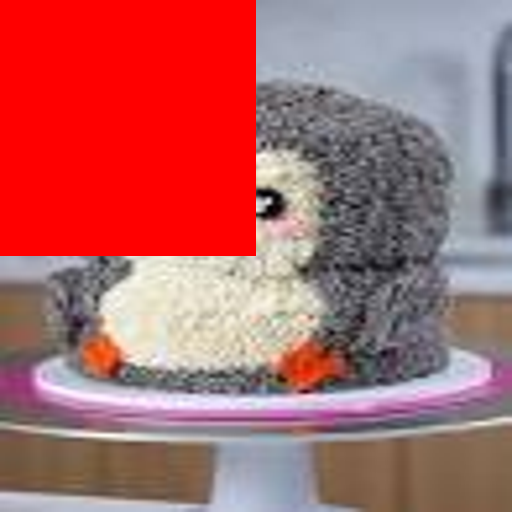

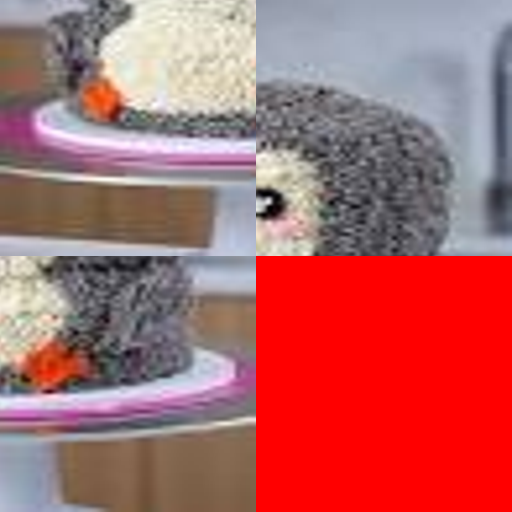

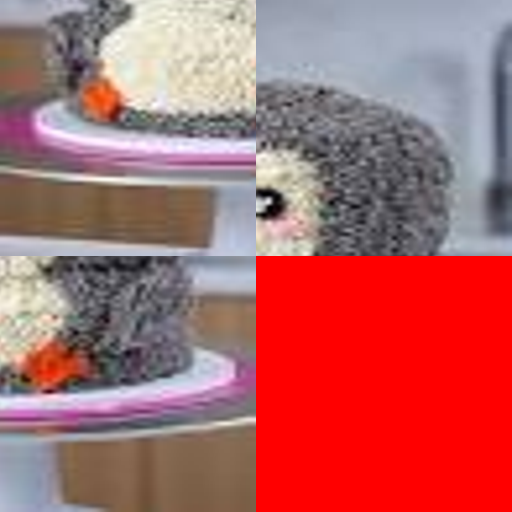

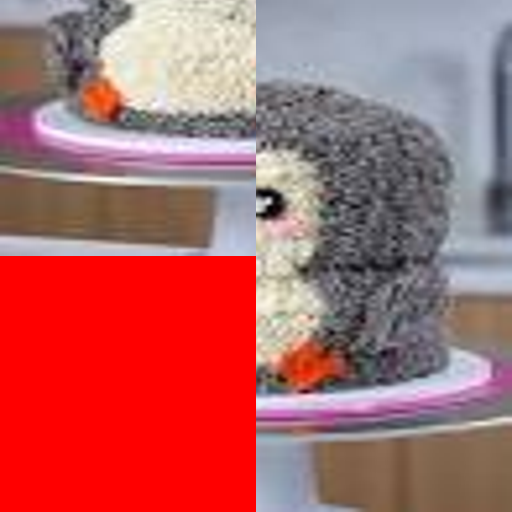

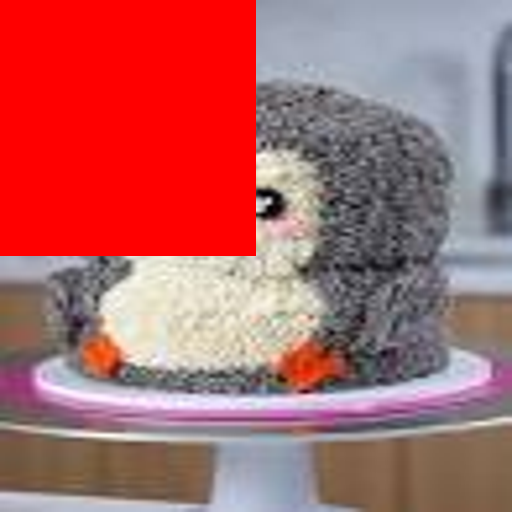

In [7]:
##########################################################################################################################
##########################################################################################################################
# random.shuffle(chunks)
# constructimage()

from PIL import Image
import random

# Open the image file
img = Image.open("images.jpg")
img = img.resize((512, 512))

# Define the chunk size
bs = 256

# Calculate the number of chunks in the x and y direction
rows = 512 // bs
columns =  512 // bs
rowstart=0
columnstart=0
rowend=bs
columnend=0
chunks=[]
target_chunks=[]
for i in range(rows):
    for j in range (columns):
        rowstart=rowstart
        rowend=rowend
        columnstart=columnend
        columnend=columnend+bs
        chunk = img.crop((columnstart, rowstart, columnend, rowend))
        chunks.append(chunk)
        target_chunks.append(chunk)
    rowstart=rowend
    rowend=rowend+bs
    columnstart=0
    columnend=0

chunks[0] = Image.new('RGB', (bs, bs), (255, 0, 0))
target_chunks[0] = Image.new('RGB', (bs, bs), (255, 0, 0))


def constructimage():
    shuffled_img1 = Image.new("RGB", (img.width, img.height))
    # Paste the shuffled chunks onto the new image
    x_offset = 0
    y_offset = 0
    for chunk in chunks:
        # Paste the chunk into the new image
        shuffled_img1.paste(chunk, (x_offset,y_offset))
        x_offset += bs
        if x_offset >= img.width:
            x_offset = 0
            y_offset += bs
    display(shuffled_img1)


def constructimage1(c):
    shuffled_img1 = Image.new("RGB", (img.width, img.height))
    # Paste the shuffled chunks onto the new image
    x_offset = 0
    y_offset = 0
    for cc in c:
        # Paste the chunk into the new image
        shuffled_img1.paste(cc, (x_offset,y_offset))
#         shuffled_img1.paste(cc, (x_offset,y_offset,x_offset+bs,y_offset+bs))
        x_offset += bs
        if x_offset >= img.width:
            x_offset = 0
            y_offset += bs
    display(shuffled_img1)

constructimage()
marker=chunks[0]
marker

random.shuffle(chunks)
constructimage()


def h(start, goal):
    temp = 0
    for i in range(2):
        for j in range(2):
            if start[i][j] != goal[i][j] and start[i][j] != marker:
                temp += 1
    return temp 


def find(block, marker):
    """ Specifically used to find the position of the blank space """
    for i in range(0,2):
        for j in range(0,2):
            if block[i][j] == marker:
                return i,j

def copy(root):
    """ Copy function to create a similar matrix of the given node"""
    temp = []
    for i in root:
        t = []
        for j in i:
            t.append(j)
        temp.append(t)
    return temp    

def generate_child(block):
    x, y = find(block,marker)
    children = []

    if y - 1 >= 0:
        temp=copy(block)
        temp[x][y]=temp[x][y-1]
        temp[x][y-1]=marker
        children.append(temp)

    if y + 1 < len(block[0]):
        temp=copy(block)
        temp[x][y]=temp[x][y+1]
        temp[x][y+1]=marker
        children.append(temp)

    if x - 1 >= 0:
        temp=copy(block)
        temp[x][y]=temp[x-1][y]
        temp[x-1][y]=marker
        children.append(temp)


    if x + 1 < len(block):
        temp=copy(block)
        temp[x][y]=temp[x+1][y]
        temp[x+1][y]=marker
        children.append(temp)




#         num=1
#         for ccc in children:
#             tt=[]
#             for i in ccc:
#                 for j in i:
#                     tt.append(j)
#             print(num)
#             constructimage1(tt)
#             num+=1    

    return children

    

    
start = [[] for i in range(2)]
goal = [[] for i in range(2)]
t=0
for i in range(2):
    for j in range(2):
        start[i].append(chunks[t])
        goal[i].append(target_chunks[t])
        t += 1

open=[]
visited=[]
open.append(start)
while open:
    current=open.pop(0)
    tt=[]
    for i in current:
        for j in i:
            tt.append(j)
    constructimage1(tt)
#     tt=copy(current)
#     print(tt)
#     break
#     constructimage1(tt)
    visited.append(current)
    if h(current,goal)==0:
        break
    else:
        l1=[]
        lv=[]
        children=generate_child(current)
        for c in children:
            l1.append(c)
            lv.append(h(c,goal))
            
            
        sorted_indices = sorted(range(len(lv)), key=lambda k: lv[k])
        sorted_list2 = [l1[i] for i in sorted_indices]
        for c in sorted_list2:
            if c not in visited:
                open.append(c)
                break
            else:
                continue
